In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Линейная регрессия с градиентным спуском

In [4]:
class LinearRegression:
    def __init__(self):
        self.w = None
    def predict(self, X):
        return X @ self.w
    def error(self, X, y):
        N = X.shape[0]
        return 1/N * (X.T @ (self.predict(X) - y))**2
    def fit(self, X, y, a=0.1, n=1000):
        self.w = pd.DataFrame(np.ones((X.shape[1], 1)))
        N = X.shape[0]
        for i in range(n):
            error = self.error(X, y)
            f = self.predict(X)
            grad = 2/N * (X.T @ (f - y))
            self.w -= a * grad
    def score(self, y_, y):
        return 1 - ((y - y_)**2).sum()/((y - y.mean())**2).sum()
    def plot(self, X, y):
        yy = self.predict(X)
        plt.scatter(yy,y)
        plt.plot(yy, yy, c='r')
        plt.show()

In [5]:
X, y = make_regression(n_samples=1000, n_features=100, noise=50, random_state=42)
X, y = pd.DataFrame(X), pd.DataFrame(y)
model = LinearRegression()
model.fit(X, y)

In [6]:
model.score(model.predict(X), y)

0    0.92287
dtype: float64

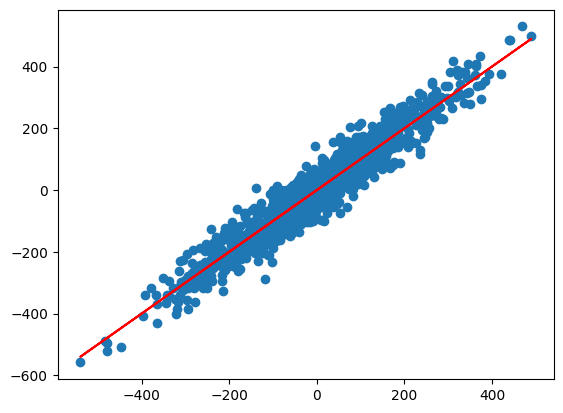

In [7]:
model.plot(X, y)

# Линейная регрессия с стохастическим градиентным спуском

In [8]:
class LinearRegressionStoh:
    def __init__(self):
        self.w = None
    def predict(self, X):
        return X @ self.w
    def error(self, X, y):
        N = X.shape[0]
        return 1/N * (X.T @ (self.predict(X) - y))**2
    def fit(self, X, y, B, E, a=0.1, n=1000):
        self.w = pd.DataFrame(np.ones((X.shape[1], 1)))
        N = X.shape[0]
        for i in range(E):
            l = 0
            while l < N:
                batch_x = X.iloc[l:l+B]
                batch_y = y.iloc[l:l+B]
                error = self.error(batch_x, batch_y)
                f = self.predict(batch_x)
                grad = 2/N * (batch_x.T @ (f - batch_y))
                self.w -= a * grad
                l += B
    def score(self, y_, y):
        return 1 - ((y - y_)**2).sum()/((y - y.mean())**2).sum()
    def plot(self, X, y):
        yy = self.predict(X)
        plt.scatter(yy,y)
        plt.plot(yy, yy, c='r')
        plt.show()
         

In [9]:
X, y = make_regression(n_samples=1000, n_features=100, noise=50, random_state=42)
X, y = pd.DataFrame(X), pd.DataFrame(y)

In [10]:
model = LinearRegressionStoh()
model.fit(X, y, B=50, E=20)
model.score(model.predict(X), y)

0    0.921834
dtype: float64

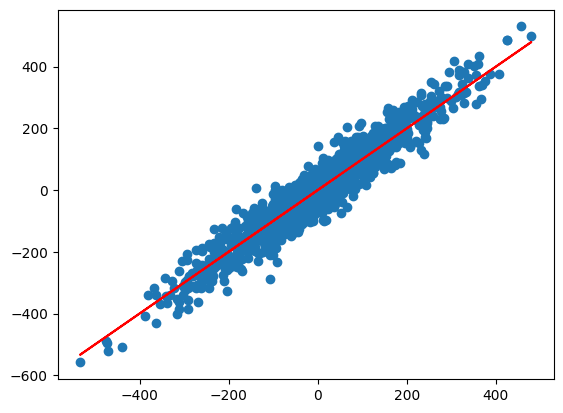

In [11]:
model.plot(X, y)

# Линейная регрессия с $L^2$-регуляризацией

In [141]:
class LinearRegressionL2:
    def __init__(self):
        self.w = None
    def predict(self, X):
        return X @ self.w
    def error(self, X, y, lambd):
        N = X.shape[0]
        return 1/N * (X.T @ (self.predict(X) - y))**2 + lambd*((self.w**2).sum())
    def fit(self, X, y, lambd, a=0.1, n=1000):
        b = [] ##
        self.w = pd.DataFrame(np.ones((X.shape[1], 1)))
        N = X.shape[0]
        for i in range(n):
            b.append(self.w.T) ##
            error = self.error(X, y, lambd)
            f = self.predict(X)
            grad = 2/N * (X.T @ (f - y)) + 2*lambd*self.w
            self.w -= a * grad
        return b ##
    def score(self, y_, y):
        return 1 - ((y - y_)**2).sum()/((y - y.mean())**2).sum()
    def plot(self, X, y):
        yy = self.predict(X)
        plt.scatter(yy,y)
        plt.plot(yy, yy, c='r')
        plt.show()
         

In [142]:
X, y = make_regression(n_samples=100, n_features=2, noise=1, random_state=42, effective_rank=None)

In [143]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape((-1, 1)))
X, y = pd.DataFrame(X), pd.DataFrame(y)

In [144]:
lambd = 0.01
n = 100

In [145]:
model = LinearRegressionL2()
b_arr = model.fit(X, y, n=2000, a=0.1, lambd=lambd)
b_arr = pd.DataFrame([b_arr[i].values[0] for i in range(len(b_arr))])
model.score(model.predict(X), y)

0    0.999807
dtype: float64

In [146]:
b_arr

,0,1
0,1.000000,1.000000
1,0.936105,0.934323
2,0.885542,0.882326
3,0.845528,0.841159
4,0.813864,0.808566
...,...,...
1995,0.693781,0.684665
1996,0.693781,0.684665
1997,0.693781,0.684665
1998,0.693781,0.684665


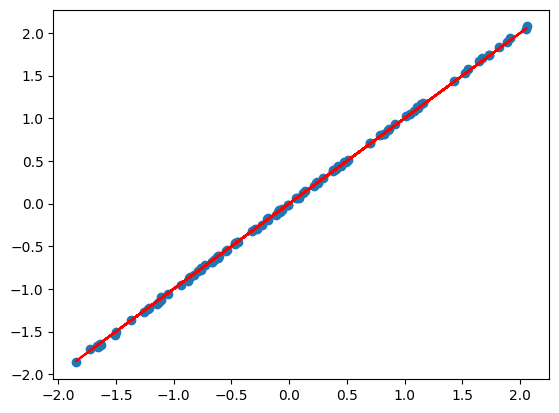

In [147]:
model.plot(X, y)

In [148]:
def B2_VISUAL(b, k = 1,lamb_l1=0,lamb_l2=0,num_points=100):
  plt.plot(b[0],b[1])
  plt.grid('ON')
  plt.xlim(-np.max(b) - k,np.max(b) + k)
  plt.ylim(-np.max(b) - k,np.max(b) + k)

  limit = np.max(np.abs(b)) + 1
  # Create a grid of b1 and b2 values
  b1 = np.linspace(-limit, limit, num_points)
  b2 = np.linspace(-limit, limit, num_points)
  B1, B2 = np.meshgrid(b1, b2)
  
  # Calculate L1 and L2 penalties
  if (lamb_l1!=0):
    L1_penalty = lamb_l1 * (np.abs(B1) + np.abs(B2))
    # Plot L1 regularization isolines with gradient color change
    contour_L1 = plt.contourf(B1, B2, L1_penalty, levels=20, cmap="Oranges_r")
    plt.colorbar(contour_L1, label="L1 Penalty")
    plt.plot(b[:, 0], b[:, 1], "bo-", label="Trajectory")
    plt.title("L1 Regularization Isolines")
    plt.xlabel("$b_1$")
    plt.ylabel("$b_2$")
    plt.grid(True)
    plt.legend()
  if (lamb_l2!=0):
    L2_penalty = lamb_l2 * (B1**2 + B2**2)
    contour_L2 = plt.contourf(B1, B2, L2_penalty, levels=20, cmap="Blues_r")
    plt.colorbar(contour_L2, label="L2 Penalty")
    plt.plot(b[0], b[1], "bo-", label="Trajectory")
    plt.title("L2 Regularization Isolines")
    plt.xlabel("$b_1$")
    plt.ylabel("$b_2$")
    plt.grid(True)


  plt.show()

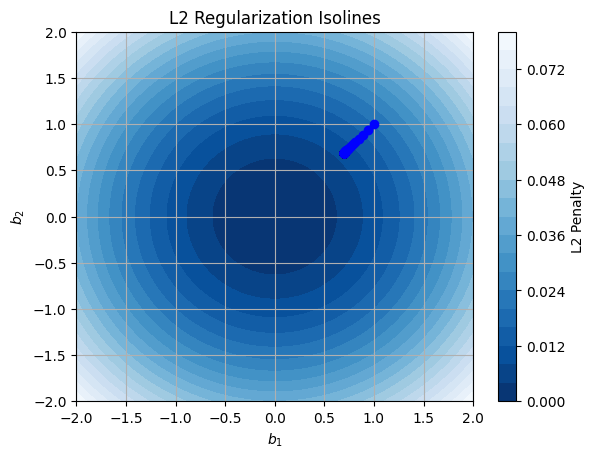

In [150]:
B2_VISUAL(b_arr, k=1, lamb_l2=lambd, num_points=n)

# Линейная регрессия с MAE

In [ ]:
class LinearRegressionMAE:
    def __init__(self):
        self.w = None
    def predict(self, X):
        return X @ self.w
    def error(self, X, y):
        N = X.shape[0]
        return 1/N * abs(self.predict(X) - y)
    def fit(self, X, y, a=0.1, n=1000):
        self.w = pd.DataFrame(np.ones((X.shape[1], 1)))
        N = X.shape[0]
        for i in range(n):
            error = self.error(X, y)
            f = self.predict(X)
            grad = -1/N * np.sign(f - y)
            self.w -= a * grad
    def score(self, y_, y):
        return 1 - ((y - y_)**2).sum()/((y - y.mean())**2).sum()
    def plot(self, X, y):
        yy = self.predict(X)
        plt.scatter(yy,y)
        plt.plot(yy, yy, c='r')
        plt.show()

In [52]:
X, y = make_regression(n_samples=30, n_features=1, noise=1, random_state=42, effective_rank=None)
X, y = pd.DataFrame(X), pd.DataFrame(y)

In [66]:
model = LinearRegressionMAE()
model.fit(X, y, a=0.5, n=10000)
model.score(model.predict(X), y)

0    0.999413
dtype: float64

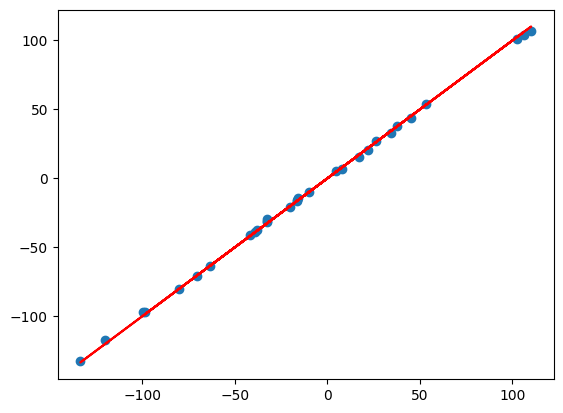

In [67]:
model.plot(X, y)

# Линейная регрессия с $L^1$-регуляризацией

In [127]:
class LinearRegressionL1:
    def __init__(self):
        self.w = None
    def predict(self, X):
        return X @ self.w
    def error(self, X, y, lambd):
        N = X.shape[0]
        return 1/N * (X.T @ (self.predict(X) - y))**2 + lambd*((abs(self.w)).sum())
    def fit(self, X, y, lambd, a=0.1, n=1000):
        b = [] ##
        self.w = pd.DataFrame(np.ones((X.shape[1], 1)))
        N = X.shape[0]
        for i in range(n):
            b.append(self.w.T) ##
            error = self.error(X, y, lambd)
            f = self.predict(X)
            grad = 2/N * (X.T @ (f - y)) + lambd*np.sign(self.w.sum())
            self.w -= a * grad
        return b ##
    def score(self, y_, y):
        return 1 - ((y - y_)**2).sum()/((y - y.mean())**2).sum()
    def plot(self, X, y):
        yy = self.predict(X)
        plt.scatter(yy,y)
        plt.plot(yy, yy, c='r')
        plt.show()
         

In [128]:
X, y = make_regression(n_samples=30, n_features=2, noise=1, random_state=42, effective_rank=None)

In [129]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape((-1, 1)))
X, y = pd.DataFrame(X), pd.DataFrame(y)

In [136]:
model = LinearRegressionL1()
b_arr = model.fit(X, y, lambd=0.1, a=0.1, n=1000)
b_arr = pd.DataFrame([b_arr[i].values[0] for i in range(len(b_arr))])
model.score(model.predict(X), y)

0    0.99392
dtype: float64

In [137]:
def B2_VISUAL(b, k = 1,lamb_l1=0,lamb_l2=0,num_points=100):
  plt.plot(b[0],b[1])
  plt.grid('ON')
  plt.xlim(-np.max(b) - k,np.max(b) + k)
  plt.ylim(-np.max(b) - k,np.max(b) + k)

  limit = np.max(np.abs(b)) + 1
  # Create a grid of b1 and b2 values
  b1 = np.linspace(-limit, limit, num_points)
  b2 = np.linspace(-limit, limit, num_points)
  B1, B2 = np.meshgrid(b1, b2)
  
  # Calculate L1 and L2 penalties
  if (lamb_l1!=0):
    L1_penalty = lamb_l1 * (np.abs(B1) + np.abs(B2))
    # Plot L1 regularization isolines with gradient color change
    contour_L1 = plt.contourf(B1, B2, L1_penalty, levels=20, cmap="Oranges_r")
    plt.colorbar(contour_L1, label="L1 Penalty")
    plt.plot(b[0], b[1], "bo-", label="Trajectory")
    plt.title("L1 Regularization Isolines")
    plt.xlabel("$b_1$")
    plt.ylabel("$b_2$")
    plt.grid(True)
    plt.legend()
  if (lamb_l2!=0):
    L2_penalty = lamb_l2 * (B1**2 + B2**2)
    contour_L2 = plt.contourf(B1, B2, L2_penalty, levels=20, cmap="Blues_r")
    plt.colorbar(contour_L2, label="L2 Penalty")
    plt.plot(b[0], b[1], "bo-", label="Trajectory")
    plt.title("L2 Regularization Isolines")
    plt.xlabel("$b_1$")
    plt.ylabel("$b_2$")
    plt.grid(True)


  plt.show()

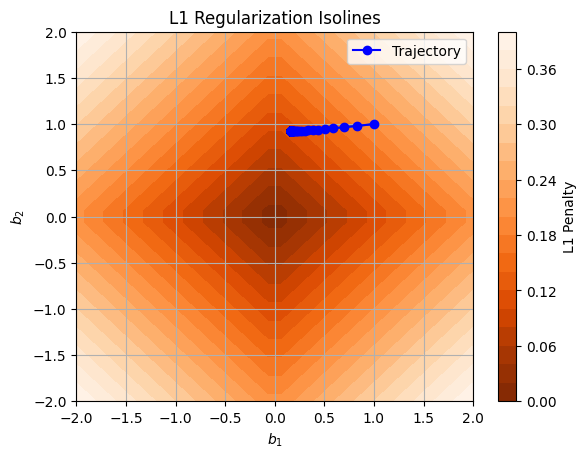

In [138]:
B2_VISUAL(b_arr, k=1, lamb_l1=0.1, num_points=30)